In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [2]:
cats = glob.glob('cats/*.jpg')
dogs = glob.glob('dogs/*.jpg')

In [3]:
images = []
labels = []

for i in cats:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in dogs:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)

In [4]:
label_names = {1:'cat',2:'dog'}

In [5]:
from sklearn.utils import shuffle
images,labels = shuffle(images,labels)

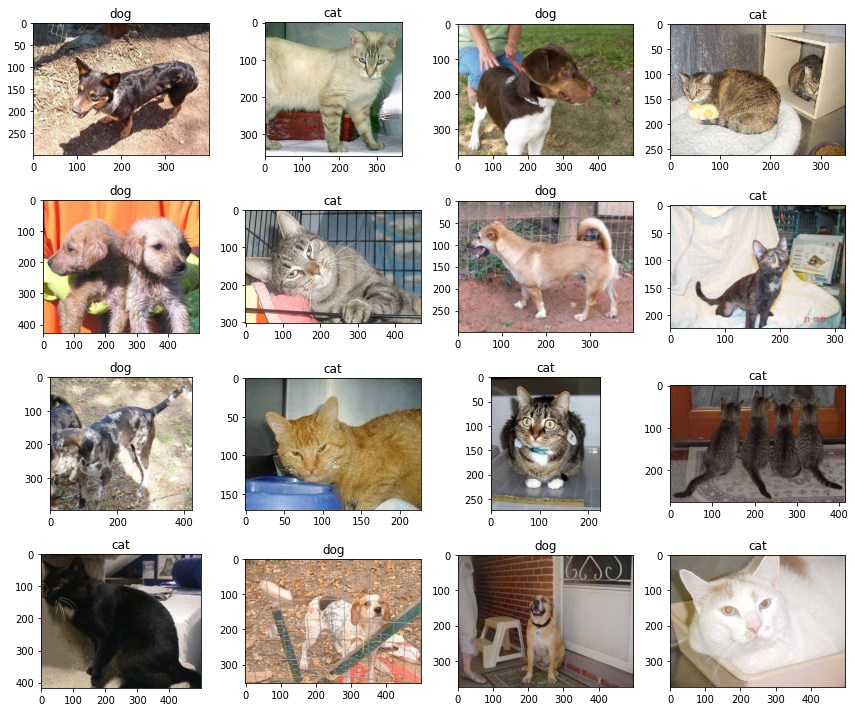

In [6]:
plt.figure(figsize=(12,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(label_names[labels[i]])
plt.tight_layout()

In [7]:
for i in range(10):
    print(images[i].shape)

(300, 399, 3)
(359, 368, 3)
(374, 500, 3)
(261, 350, 3)
(428, 500, 3)
(303, 469, 3)
(300, 400, 3)
(223, 320, 3)
(398, 423, 3)
(171, 228, 3)


In [8]:
from skimage.transform import resize

In [10]:
images = images[0:300]

In [11]:
labels = labels[0:300]

In [16]:
X = []

for i in images:
    X.append(resize(i,(300,300,3)))
    

In [18]:
x = np.array(X)
y = np.array(labels)

In [20]:
d1,d2,d3,d4 = x.shape

In [21]:
X = x.reshape(d1,d2*d3*d4)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.svm import SVC

In [26]:
svc = SVC()

In [27]:
%time svc.fit(xtrain,ytrain)

CPU times: user 43.1 s, sys: 4.73 s, total: 47.8 s
Wall time: 4.24 s


SVC()

In [28]:
svc.score(xtrain,ytrain)

0.9166666666666666

In [29]:
y_pred = svc.predict(xtest)

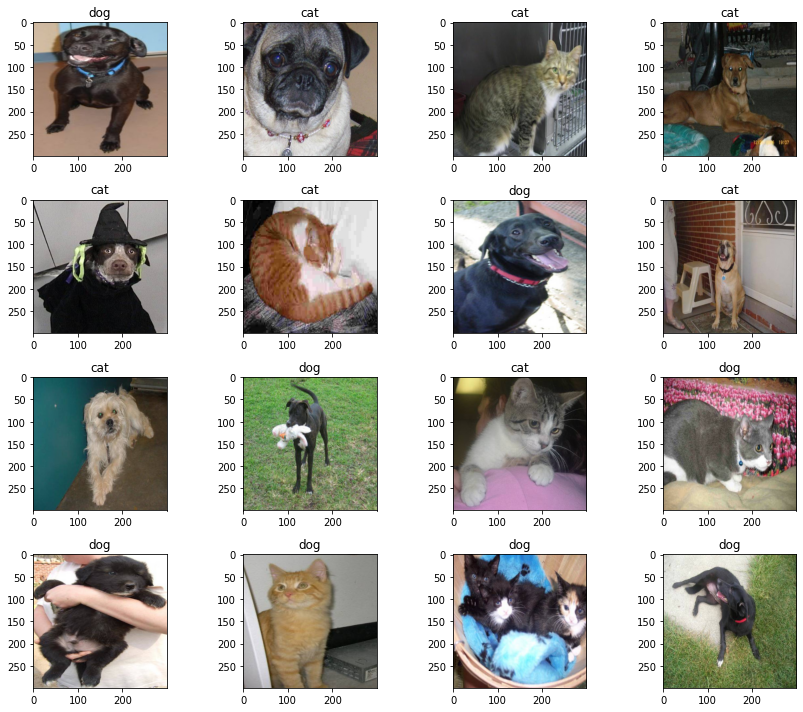

In [31]:
plt.figure(figsize=(12,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(xtest[i].reshape(300,300,3))
    plt.title(label_names[y_pred[i]])
plt.tight_layout()

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
accuracy_score(ytest,y_pred)

0.5666666666666667

<AxesSubplot:>

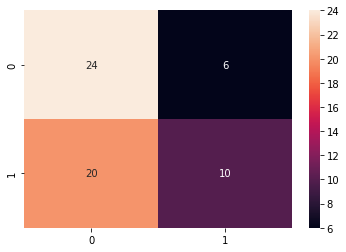

In [35]:
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True)

In [36]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           1       0.55      0.80      0.65        30
           2       0.62      0.33      0.43        30

    accuracy                           0.57        60
   macro avg       0.59      0.57      0.54        60
weighted avg       0.59      0.57      0.54        60

